In [179]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
data= pd.read_csv("pokemon.csv")
from google.colab import drive
drive.mount("/content/drive")

#regresion lineal simple y multiple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# 1 LIMPIEZA
data

,nombre,indice_guia,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,Weight,Height,Legendario,generacion,fuerza_combate
0,Bulbasaur,1,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,2,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,3,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720
3,Charmander,4,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,1,980
4,Charmeleon,5,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Landorus,645,205.0,261.0,182.0,Ground,Flying,173.0,0.02,0.01,68.0,1.5,Sí,5,3588
645,Kyurem,646,245.0,246.0,170.0,Dragon,Ice,205.0,0.02,0.01,325.0,3.0,Sí,5,3575
646,Keldeo,647,209.0,260.0,192.0,Water,Fighting,177.0,0.02,0.01,48.5,1.4,No,5,3698
647,Meloetta,648,225.0,250.0,225.0,Normal,Psychic,189.0,0.02,0.01,6.5,0.6,No,5,3972


In [181]:
data.shape

(649, 15)

In [182]:
data.columns

Index(['nombre', 'indice_guia', 'resistencia', 'ataque', 'defensa',
       'tipo_primario', 'tipo_secundario', 'max_salud', 'tasa_captura',
       'tasa_escape', 'Weight', 'Height', 'Legendario', 'generacion',
       'fuerza_combate'],
      dtype='object')

In [183]:
# indice_guia esta de mas 
data = data.drop(["indice_guia"], axis=1)

In [184]:
data

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,Weight,Height,Legendario,generacion,fuerza_combate
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720
3,Charmander,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,1,980
4,Charmeleon,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Landorus,205.0,261.0,182.0,Ground,Flying,173.0,0.02,0.01,68.0,1.5,Sí,5,3588
645,Kyurem,245.0,246.0,170.0,Dragon,Ice,205.0,0.02,0.01,325.0,3.0,Sí,5,3575
646,Keldeo,209.0,260.0,192.0,Water,Fighting,177.0,0.02,0.01,48.5,1.4,No,5,3698
647,Meloetta,225.0,250.0,225.0,Normal,Psychic,189.0,0.02,0.01,6.5,0.6,No,5,3972


In [185]:
# "Weight" en español es peso
# "Height" en español es altura

data.rename(columns= {"max_salud": "salud_maxima", "Weight": "peso", "Height": "altura", "Legendario": "legendario"}, inplace= True)

In [277]:
data

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720
3,Charmander,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,1,980
4,Charmeleon,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Landorus,205.0,261.0,182.0,Ground,Flying,173.0,0.02,0.01,68.0,1.5,Sí,5,3588
645,Kyurem,245.0,246.0,170.0,Dragon,Ice,205.0,0.02,0.01,325.0,3.0,Sí,5,3575
646,Keldeo,209.0,260.0,192.0,Water,Fighting,177.0,0.02,0.01,48.5,1.4,No,5,3698
647,Meloetta,225.0,250.0,225.0,Normal,Psychic,189.0,0.02,0.01,6.5,0.6,No,5,3972


In [186]:
data.isna()

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [187]:
data.isna().sum()

nombre             0
resistencia        5
ataque             5
defensa            5
tipo_primario      5
tipo_secundario    5
salud_maxima       5
tasa_captura       5
tasa_escape        5
peso               0
altura             4
legendario         1
generacion         0
fuerza_combate     0
dtype: int64

In [188]:
lista = [False, False, True, False, True]
sum(lista)

2

In [189]:
data.dropna()

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720
3,Charmander,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,1,980
4,Charmeleon,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Landorus,205.0,261.0,182.0,Ground,Flying,173.0,0.02,0.01,68.0,1.5,Sí,5,3588
645,Kyurem,245.0,246.0,170.0,Dragon,Ice,205.0,0.02,0.01,325.0,3.0,Sí,5,3575
646,Keldeo,209.0,260.0,192.0,Water,Fighting,177.0,0.02,0.01,48.5,1.4,No,5,3698
647,Meloetta,225.0,250.0,225.0,Normal,Psychic,189.0,0.02,0.01,6.5,0.6,No,5,3972


In [190]:
mascara = data["tipo_primario"].isna()
data[mascara]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
175,Togetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,0.61,No,2,1708
248,Lugia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,5.21,Sí,2,3703
345,Cradily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.4,1.50,No,3,2211
568,Garbodor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.3,1.90,No,5,2345
580,Swanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.2,1.30,No,5,2088


In [191]:
mascara_tasa_escape = data["tasa_escape"].isnull()
mascara_tasa_escape

0      False
1      False
2      False
3      False
4      False
       ...  
644    False
645    False
646    False
647    False
648    False
Name: tasa_escape, Length: 649, dtype: bool

In [192]:
data.loc[mascara_tasa_escape]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
175,Togetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,0.61,No,2,1708
248,Lugia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,5.21,Sí,2,3703
345,Cradily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.4,1.50,No,3,2211
568,Garbodor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.3,1.90,No,5,2345
580,Swanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.2,1.30,No,5,2088


In [193]:
data_modificada = data.dropna(axis=0, thresh=7)
data_modificada.isna().sum()

nombre             0
resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
salud_maxima       0
tasa_captura       0
tasa_escape        0
peso               0
altura             4
legendario         1
generacion         0
fuerza_combate     0
dtype: int64

In [194]:
data.dropna(axis=0, thresh=7, inplace=True)
data.isna().sum()


nombre             0
resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
salud_maxima       0
tasa_captura       0
tasa_escape        0
peso               0
altura             4
legendario         1
generacion         0
fuerza_combate     0
dtype: int64

In [195]:
data.loc[mascara_tasa_escape]
print(data.shape)
data.isnull().sum()

(644, 14)


nombre             0
resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
salud_maxima       0
tasa_captura       0
tasa_escape        0
peso               0
altura             4
legendario         1
generacion         0
fuerza_combate     0
dtype: int64

In [196]:
data_legendario = data["legendario"].isnull()
data_legendario


0      False
1      False
2      False
3      False
4      False
       ...  
644    False
645    False
646    False
647    False
648    False
Name: legendario, Length: 644, dtype: bool

In [197]:
data.loc[data_legendario]
data["legendario"].value_counts()

No    605
Sí     38
Name: legendario, dtype: int64

In [198]:
data.loc[data_legendario, "legendario"] = "No"

In [199]:
data.loc[data_legendario]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
162,Hoothoot,155.0,67.0,88.0,Normal,Flying,134.0,0.5,0.15,21.2,0.71,No,2,677


In [200]:
print(data["legendario"].value_counts())
data.isnull().sum()

No    606
Sí     38
Name: legendario, dtype: int64


nombre             0
resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
salud_maxima       0
tasa_captura       0
tasa_escape        0
peso               0
altura             4
legendario         0
generacion         0
fuerza_combate     0
dtype: int64

In [201]:
data_altura = data["altura"].isnull()
data_altura

0      False
1      False
2      False
3      False
4      False
       ...  
644    False
645    False
646    False
647    False
648    False
Name: altura, Length: 644, dtype: bool

In [202]:
data.loc[data_altura]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
123,Jynx,163.0,223.0,151.0,Ice,Psychic,140.0,0.3,0.09,40.6,NaN,No,1,2555
128,Magikarp,85.0,29.0,85.0,Water,None,79.0,0.7,0.15,10.0,NaN,No,1,274
352,Shuppet,127.0,138.0,65.0,Ghost,None,112.0,0.4,0.10,2.3,NaN,No,3,1018
435,Bronzor,149.0,43.0,154.0,Steel,Psychic,129.0,0.5,0.10,60.5,NaN,No,4,603


In [203]:
promedio_altura = data["altura"].mean()

promedio_altura

1.1431406249999998

In [204]:
round(promedio_altura, 2)

1.14

In [205]:
data["altura"] = data["altura"].fillna(promedio_altura)

In [206]:
data.isnull().sum()

nombre             0
resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
salud_maxima       0
tasa_captura       0
tasa_escape        0
peso               0
altura             0
legendario         0
generacion         0
fuerza_combate     0
dtype: int64

In [207]:
# 2 REGRESION LINEAL SIMPLE
data.head(10)

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720
3,Charmander,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,1,980
4,Charmeleon,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1,1653
5,Charizard,186.0,223.0,173.0,Fire,Flying,158.0,0.05,0.05,90.5,1.7,No,1,2889
6,Squirtle,127.0,94.0,121.0,Water,None,112.0,0.20,0.10,9.0,0.5,No,1,946
7,Wartortle,153.0,126.0,155.0,Water,None,132.0,0.10,0.07,22.5,1.0,No,1,1488
8,Blastoise,188.0,171.0,207.0,Water,None,160.0,0.05,0.05,85.5,1.6,No,1,2466
9,Caterpie,128.0,55.0,55.0,Bug,None,113.0,0.50,0.20,2.9,0.3,No,1,437


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 648
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           644 non-null    object 
 1   resistencia      644 non-null    float64
 2   ataque           644 non-null    float64
 3   defensa          644 non-null    float64
 4   tipo_primario    644 non-null    object 
 5   tipo_secundario  644 non-null    object 
 6   salud_maxima     644 non-null    float64
 7   tasa_captura     644 non-null    float64
 8   tasa_escape      644 non-null    float64
 9   peso             644 non-null    float64
 10  altura           644 non-null    float64
 11  legendario       644 non-null    object 
 12  generacion       644 non-null    int64  
 13  fuerza_combate   644 non-null    int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 75.5+ KB


In [209]:
data.corr()

,resistencia,ataque,defensa,salud_maxima,tasa_captura,tasa_escape,peso,altura,generacion,fuerza_combate
resistencia,1.000000,0.409340,0.344523,0.999969,-0.363608,-0.361307,0.383728,0.385654,0.085182,0.598645
ataque,0.409340,1.000000,0.490581,0.408809,-0.502650,-0.411624,0.401336,0.392698,0.121585,0.924768
defensa,0.344523,0.490581,1.000000,0.344576,-0.482818,-0.481946,0.469854,0.391870,0.045170,0.707271
salud_maxima,0.999969,0.408809,0.344576,1.000000,-0.363894,-0.361581,0.384049,0.385767,0.085383,0.598311
tasa_captura,-0.363608,-0.502650,-0.482818,-0.363894,1.000000,0.498221,-0.360086,-0.349262,-0.122518,-0.568356
tasa_escape,-0.361307,-0.411624,-0.481946,-0.361581,0.498221,1.000000,-0.268499,-0.253925,-0.120099,-0.506817
peso,0.383728,0.401336,0.469854,0.384049,-0.360086,-0.268499,1.000000,0.635962,0.083922,0.537642
altura,0.385654,0.392698,0.391870,0.385767,-0.349262,-0.253925,0.635962,1.000000,-0.037439,0.479250
generacion,0.085182,0.121585,0.045170,0.085383,-0.122518,-0.120099,0.083922,-0.037439,1.000000,0.124220
fuerza_combate,0.598645,0.924768,0.707271,0.598311,-0.568356,-0.506817,0.537642,0.479250,0.124220,1.000000


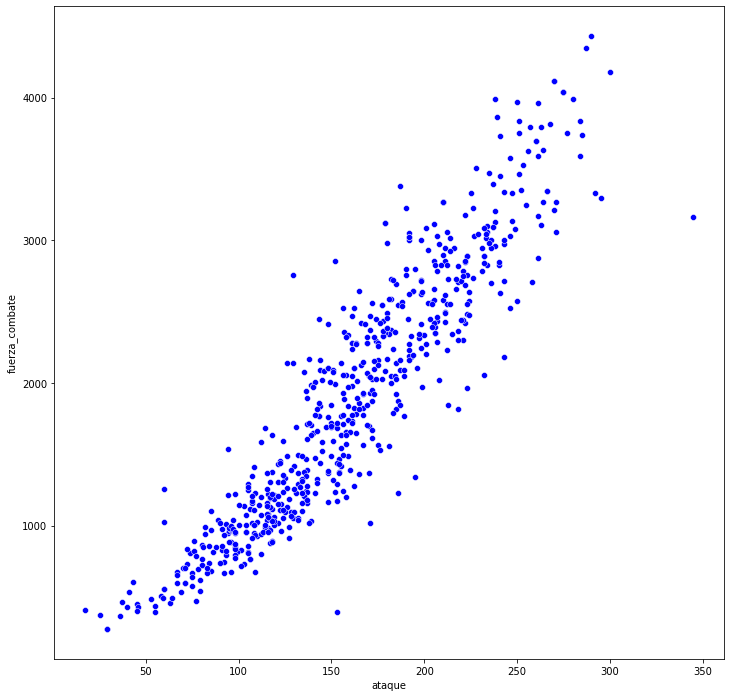

In [210]:
# Ataque porque es el mas comodo
plt.figure(figsize = (12, 12))
sns.scatterplot(data=data, x="ataque", y="fuerza_combate", color = 'b')

In [211]:
X = data["ataque"]
y = data["fuerza_combate"]

In [212]:
print(X.shape)
X.head(20)

(644,)


0     118.0
1     151.0
2     198.0
3     116.0
4     158.0
5     223.0
6      94.0
7     126.0
8     171.0
9      55.0
10     45.0
11    167.0
12     63.0
13     46.0
14    169.0
15     85.0
16    117.0
17    166.0
18    103.0
19    161.0
Name: ataque, dtype: float64

In [213]:
print(y.shape)
y.head(20)

(644,)


0     1115
1     1699
2     2720
3      980
4     1653
5     2889
6      946
7     1488
8     2466
9      437
10     450
11    1827
12     456
13     432
14    1846
15     680
16    1194
17    2129
18     734
19    1730
Name: fuerza_combate, dtype: int64

In [214]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [215]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(483,)
(483,)
(161,)
(161,)


In [216]:
grafico_rl = LinearRegression()

In [217]:
X_train =x_train.to_numpy()
X_train = np.matrix(X_train.reshape(len(X_train),1))
X_test =x_test.to_numpy()
X_test = np.matrix(X_test.reshape(len(X_test),1))

In [218]:
grafico_rl.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

In [219]:
grafico_rl.coef_

array([14.61223607])

In [220]:
grafico_rl.intercept_

-446.14063317679734

In [221]:
y_pred = grafico_rl.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([3937.53018812, 1950.26608247, 2885.44919101, 2593.20446959,
       1482.67452819, 2856.22471887, 2359.40869245, 1672.63359712,
       1263.49098713, 1847.98042997, 3192.3061485 , 2008.71502675,
       1482.67452819, 1906.42937425, 1935.65384639, 1643.40912497,
       1234.26651499,  766.67496072, 1818.75595783, 1263.49098713,
        -22.38578712, 2622.42894173, 1278.1032232 , 1789.53148568,
       3163.08167636, 2783.16353851, 1190.42980677, 2081.7762071 ,
       2198.67409567, 2637.0411778 , 2827.00024672, 1292.71545927,
       2037.93949889,  942.02179357, 2154.83738746, 1248.87875106,
        708.22601643, 2549.36776138, 1278.1032232 , 2198.67409567,
       2461.69434495, 2549.36776138, 3075.40825993, 2111.00067925,
       1570.34794462, 2081.7762071 , 1716.47030533,  562.10365572,
       2374.02092852, 1614.18465283,  752.06272464,  591.32812786,
       2169.44962353, 1745.69477747, 1716.47030533,  211.40999002,
       3367.65298135,  737.45048857,  722.8382525 , 1088.14415

In [222]:
r2 = r2_score(y_test,y_pred)
r2

0.8449618001692174

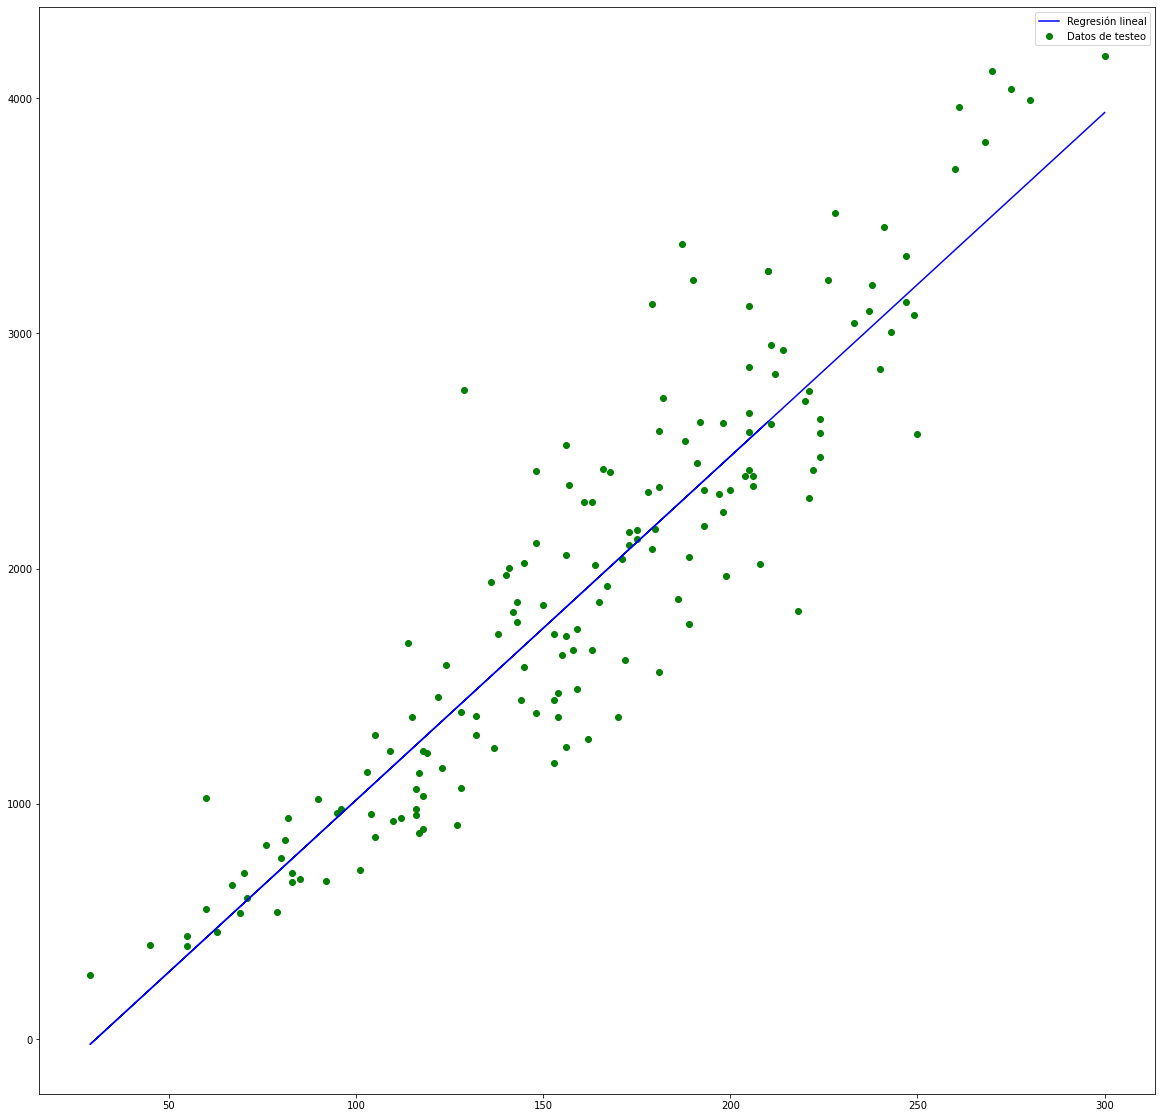

In [223]:
plt.figure(figsize = (20,20))
plt.plot(x_test, y_pred, color = 'b', label = 'Regresión lineal')
plt.scatter(x_test, y_test, color = 'g', label = 'Datos de testeo')
plt.legend()
plt.show()

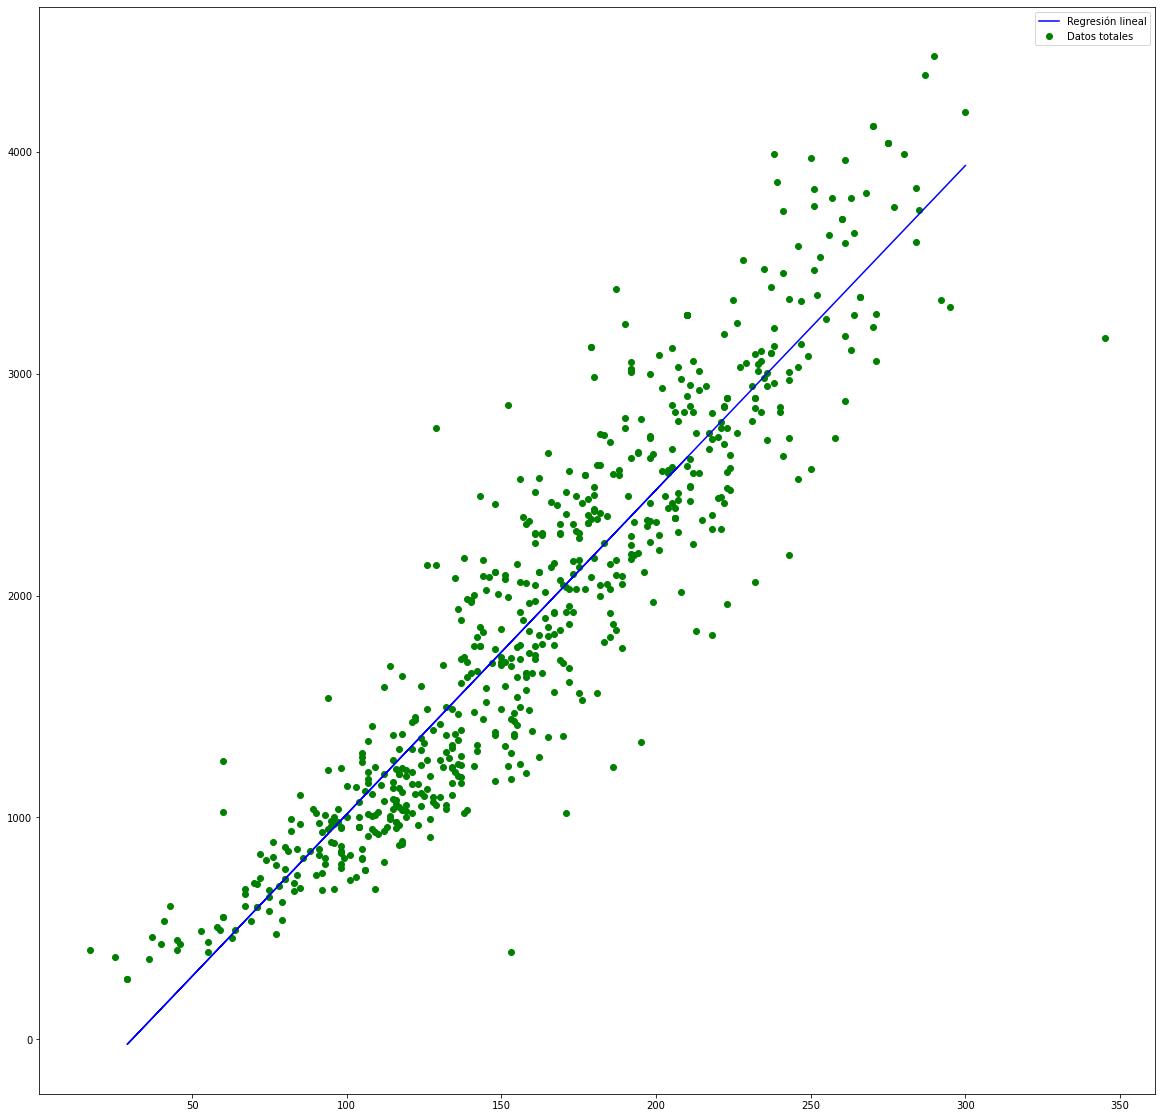

In [224]:
plt.figure(figsize = (20,20))
plt.plot(x_test, y_pred, color = 'b', label = 'Regresión lineal')
plt.scatter(X, y, color = 'g', label = 'Datos totales')
plt.legend()
plt.show()

In [225]:
modelo_sin_instanciar = LinearRegression(fit_intercept = False)

In [226]:
modelo_sin_instanciar.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression(fit_intercept=False)

In [227]:
modelo_sin_instanciar.coef_

array([12.15037])

In [228]:
modelo_sin_instanciar.intercept_

0.0

In [229]:
y_pred_sin_instanciar = modelo_sin_instanciar.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [230]:
from sklearn.metrics import r2_score
r2_sin_interc = r2_score(y_test,y_pred_sin_instanciar)
r2_sin_interc

0.8145556120065346

In [231]:
print("el R2 del modelo CON intercepto es ", round(r2,2))
print("el R2 del modelo SIN intercepto es ", round(r2_sin_interc,2))

el R2 del modelo CON intercepto es  0.84
el R2 del modelo SIN intercepto es  0.81


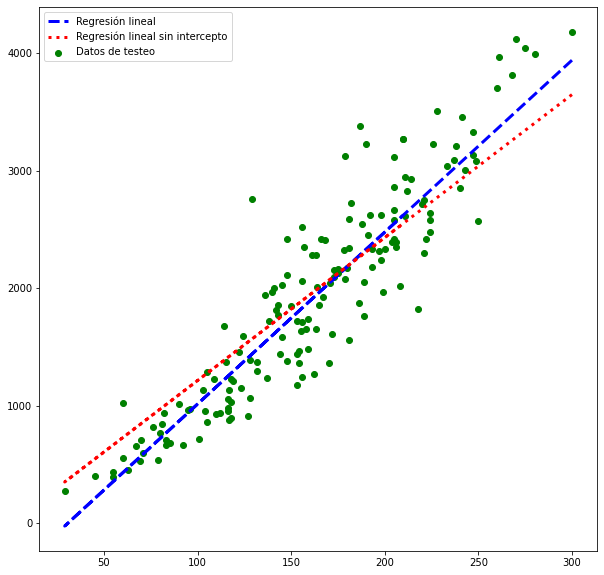

In [232]:
plt.figure(figsize = (10,10))
plt.plot(x_test, y_pred, color = 'b',linewidth=3.0,  linestyle = "--", label = 'Regresión lineal')
plt.plot(x_test, y_pred_sin_instanciar, color = 'r',linewidth=3.0,  linestyle = ":" , label = 'Regresión lineal sin intercepto')
plt.scatter(x_test, y_test, color = 'g', label = 'Datos de testeo')
plt.legend()
plt.show()

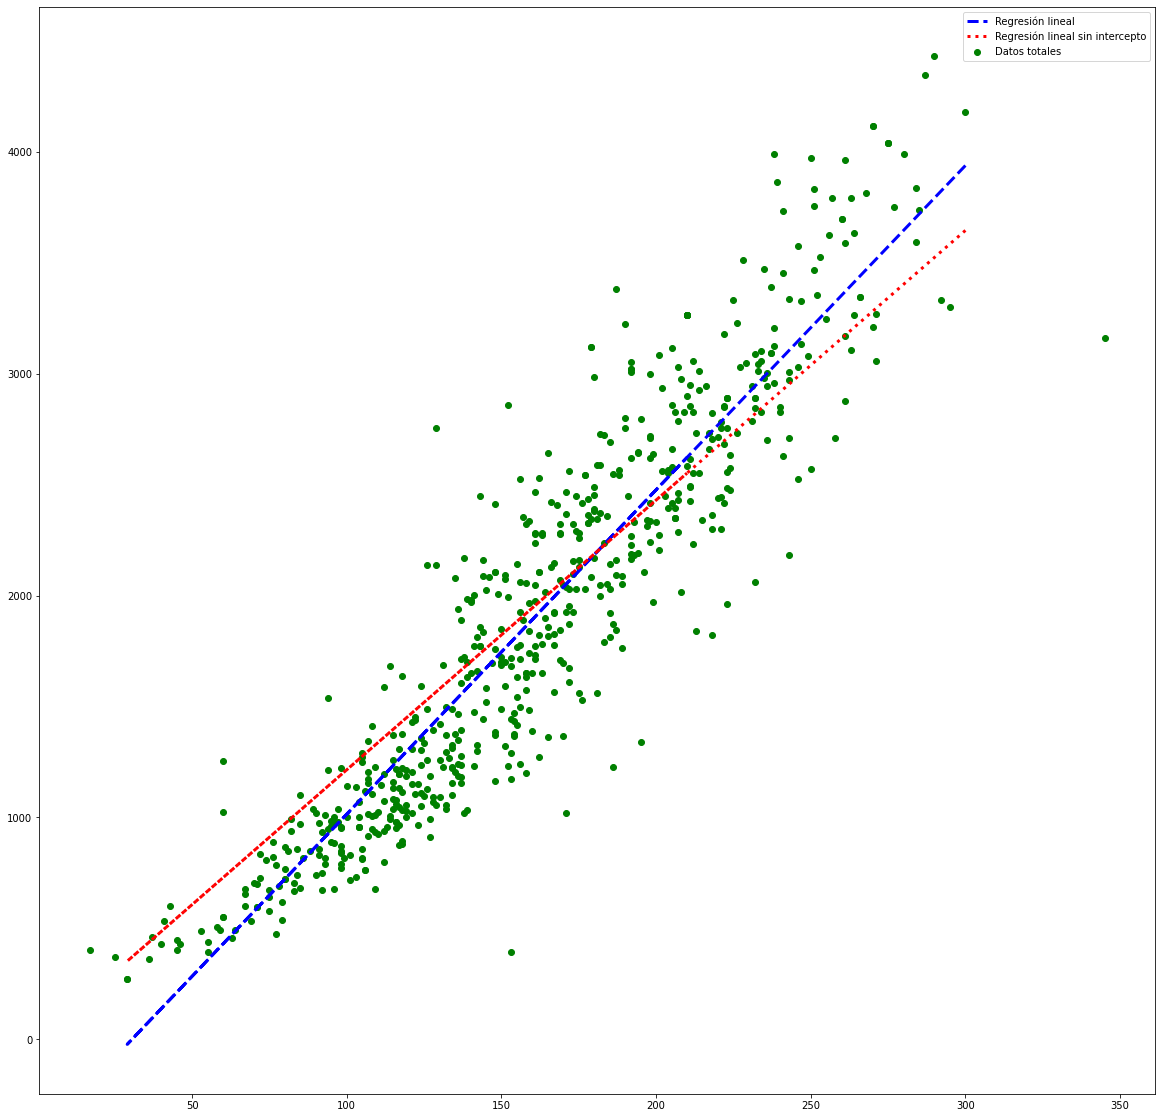

In [233]:
plt.figure(figsize = (20,20))
plt.plot(x_test, y_pred, color = 'b',linewidth=3.0,  linestyle = "--", label = 'Regresión lineal')
plt.plot(x_test, y_pred_sin_instanciar, color = 'r',linewidth=3.0,  linestyle = ":" , label = 'Regresión lineal sin intercepto')
plt.scatter(X, y, color = 'g', label = 'Datos totales')
plt.legend()
plt.show()

In [234]:
data

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,salud_maxima,tasa_captura,tasa_escape,peso,altura,legendario,generacion,fuerza_combate
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720
3,Charmander,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,1,980
4,Charmeleon,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Landorus,205.0,261.0,182.0,Ground,Flying,173.0,0.02,0.01,68.0,1.5,Sí,5,3588
645,Kyurem,245.0,246.0,170.0,Dragon,Ice,205.0,0.02,0.01,325.0,3.0,Sí,5,3575
646,Keldeo,209.0,260.0,192.0,Water,Fighting,177.0,0.02,0.01,48.5,1.4,No,5,3698
647,Meloetta,225.0,250.0,225.0,Normal,Psychic,189.0,0.02,0.01,6.5,0.6,No,5,3972


In [278]:
#Regresion lineal multiple 

In [280]:
# Z eje de abcsisas
# a eje de ordenadas
# Desprecio las columnas que no son variables predictorias
Z = data.drop(columns= ["nombre", "tipo_primario", "tipo_secundario", "legendario", "fuerza_combate"])

a = data['fuerza_combate']

In [281]:
print(Z.shape)

(644, 9)


In [282]:
print(a.shape)
a.head(5)

(644,)


0    1115
1    1699
2    2720
3     980
4    1653
Name: fuerza_combate, dtype: int64

In [283]:
 Z_train, Z_test, a_train, a_test = train_test_split(Z, a)

In [284]:
print(Z_train.shape)
print(a_train.shape)
print(Z_test.shape)
print(a_test.shape)


(483, 9)
(483,)
(161, 9)
(161,)


In [285]:
modelo_rl = LinearRegression(fit_intercept=False)

In [286]:
modelo_rl.fit(Z_train, a_train)

LinearRegression(fit_intercept=False)

In [287]:
modelo_rl.coef_

array([  88.07876025,   10.65655966,    4.97999032, -106.40418726,
         33.92498824, -187.35222079,    0.60781786,    2.48092382,
          3.56924452])

In [288]:
modelo_rl.intercept_

0.0

In [289]:
a_pred = modelo_rl.predict(Z_test)
print (a_pred)
print (a_test)

[2578.09171468 1346.35177047 2271.77825129 2050.55950337  899.59316892
  766.14769994  641.56679518 1365.62448675 3481.14649936 3096.24404062
 2586.73730943 3863.09636022 1025.26742653  816.71924154 1608.70031922
   95.98664396  954.41820813  899.92638402 1483.42046866 1234.14863837
 2341.93203893  881.72134566 2571.64632728 2851.06037781 2344.2893325
 2759.96959899 2576.58330861 2977.6039546  2333.72402503 2716.82311702
 2430.43886591 1863.53482767 1217.65336995 3907.40367144 2378.96978494
  247.26288032 2466.15759467 3036.62108985  818.52515748  663.91971322
 3264.15263515 2916.31919147  894.38009324 2382.09083476 3004.88858003
 1696.03972874 2107.3713302  3351.38705966 4065.5512957  1882.11912347
 2717.45277348  707.42493162  944.41130636 2496.53100365  923.27657735
 1477.8394588  1156.96232155 1488.39980538 3542.09064915 1956.06981807
 2568.41301811 1312.92965607 1792.43164662 1919.60093836 4050.38208292
 1205.23393643 2825.60313632 1790.90137362 1477.7256991   644.19215542
 1125.8

In [290]:
mae = mean_absolute_error(a_test, a_pred)
mae

104.31180757943477

In [291]:
mse= mean_squared_error(a_test, a_pred)
mse

23058.172565744484

In [292]:
rmse = np.sqrt(mse)

In [293]:
r2 = r2_score(a_test, a_pred)
r2

0.973035676772763

In [294]:
print("La Media del Error Absoluto  del modelo es", round(mae))
print("La Media del Error cuadrático del modelo es", round(mse))
print("La raíz del error cuadrático medio del modelo es", round(rmse))
print("El R2 del modelo es", round(r2,2))

La Media del Error Absoluto  del modelo es 104
La Media del Error cuadrático del modelo es 23058
La raíz del error cuadrático medio del modelo es 152
El R2 del modelo es 0.97


In [295]:
modelo_sin_inter = LinearRegression(fit_intercept = False)

In [296]:
modelo_sin_inter.fit(Z_train, a_train)

LinearRegression(fit_intercept=False)

In [297]:
modelo_sin_inter.coef_

array([  88.07876025,   10.65655966,    4.97999032, -106.40418726,
         33.92498824, -187.35222079,    0.60781786,    2.48092382,
          3.56924452])

In [298]:
modelo_sin_inter.intercept_

0.0

In [299]:
a_pred_sin_inter = modelo_sin_inter.predict(Z_test)

In [300]:
mae_sin_inter = mean_absolute_error(a_test, a_pred_sin_inter)
mse_sin_inter = mean_squared_error(a_test, a_pred_sin_inter)
rmse_sin_inter = np.sqrt(mse)
r2_sin_inter = r2_score(a_test, a_pred_sin_inter)

In [301]:
print("La Media del Error Absoluto  del modelo sin intercepto es", round(mae_sin_inter,2))
print("La Media del Error cuadrático del modelo sin intercepto es", round(mse_sin_inter,2))
print("La raíz del error cuadrático medio del modelo sin intercepto es", round(rmse_sin_inter,2))
print("El R2 del modelo sin intercepto es", round(r2_sin_inter,2))

La Media del Error Absoluto  del modelo sin intercepto es 104.31
La Media del Error cuadrático del modelo sin intercepto es 23058.17
La raíz del error cuadrático medio del modelo sin intercepto es 151.85
El R2 del modelo sin intercepto es 0.97


In [302]:
hiperparametros_default = pd.Series({'mae': mae, 'mse': mse,'rmse': rmse, 'r2': r2})
sin_intercepto= pd.Series({'mae': mae_sin_inter, 'mse': mse_sin_inter,'rmse': rmse_sin_inter, 'r2': r2_sin_inter})
resultados = pd.DataFrame({'hiperparametros_default':hiperparametros_default, 'sin_intercepto':sin_intercepto})
resultados

,hiperparametros_default,sin_intercepto
mae,104.311808,104.311808
mse,23058.172566,23058.172566
rmse,151.849177,151.849177
r2,0.973036,0.973036
